<a href="https://colab.research.google.com/github/avvnessa/Data-Mining/blob/main/TF_UFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

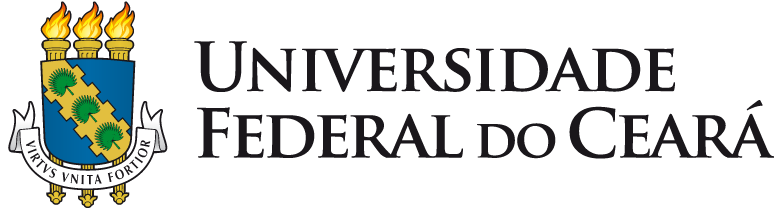

# **Mineração de Dados, Curagem, Avaliação Preditiva e Criação de MLP**


Nome do Aluno:  Maria Bianca Sousa Costa       
Código do Aluno: 517591

Nome do Aluno:   Maria Vanessa Sousa Mesquita      
Código do Aluno: 519213

Neste trabalho você deve carregar o dataset *DataSet_18_10_2023.csv* e o significado das colunas da tabelas está no arquivo atributos-dataset.pdf.

Ambos os arquivos estão no Google Drive na pasta Itapajé/TF

## Objetivos

* Executar as etapas da mineração de dados indicando cada uma delas
* Identificar as Features adequadas ao problema
* Encontrar padrões nos dados que sejam pertinentes ao problema
* Criar uma rede neural simples para desempenhar a classificação binária do Dropout
* Treinar a rede neural usando o dataset ajustado ao problema
* Avaliar o modelo e o desempenho do treinamento da rede neural

## O Problema: Predizer se um aluno irá evadir ou não uma disciplina (Droupout)

Uma universidade fez levantamento dos dados de uma disciplina que tem evasão escolar (dropout) elevado. Para isto contratou uma equipe de Cientistas dos Dados para avaliar os dados e desenvolver uma MLP que pudesse servir de modelo de predição deste evento.

# Parabéns Você foi selecionado para avaliar estes dados!

# Código da Rede Neural

### Preparando o Ambiente

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Bibliotecas

In [ ]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## Limpando o dataset

Retirando as possíveis linhas duplicadas e/ou com valores ausentes, em seguida usando a função describe obtemos as medidas de posição e disperção para cada coluna.

In [ ]:
dados = "/content/drive/MyDrive/colab_note_mineracao/DataSet_18_10_2023.csv"
data = pd.read_csv(dados)

# linhas duplicadas e valores ausentes
data = data.drop_duplicates().dropna()
print(data.shape)

# Medidas de posição e dispersão
medidas_descritivas = data.describe()
print(medidas_descritivas)


(1554, 26)
       num_registrations  num_registrations_course_conferent_degree  \
count        1554.000000                                1554.000000   
mean            2.138996                                   6.590734   
std             1.562185                                   2.433363   
min             1.000000                                   0.000000   
25%             1.000000                                   5.000000   
50%             1.000000                                   6.000000   
75%             3.000000                                   8.000000   
max            12.000000                                  23.000000   

       working_student          age   total_ects  registrations  repetitions  \
count      1554.000000  1554.000000  1554.000000    1554.000000  1554.000000   
mean          0.042471    26.740669    69.319820       1.474260     0.725225   
std           0.201726     3.966415    10.846053       1.038682     1.080075   
min           0.000000    20.

## Correlação
achamos interessante o fato de que a coluna year since registration tem uma relação com a idade, mas tem uma relação mt baixa com dropout. Teorizamos que as pessoas estariam com a matrícula "aberta" por muitos anos. Foi possível perceber uma correlação moderada/fraca positiva entre age e dropout, mas acreditamos que seja necessário uma análise de multicolinearidade. Tentamos correlacionar uma coluna criada(idade de entrada) com outra coluna criada(ano de entrada considerando somente o primeiro ano de matrícula) com idade e com dropout, no entanto as tentativas não resultaram em um insight que fizesse sentido, portanto, foi descartado.

<ipython-input-158-387ee353c779>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


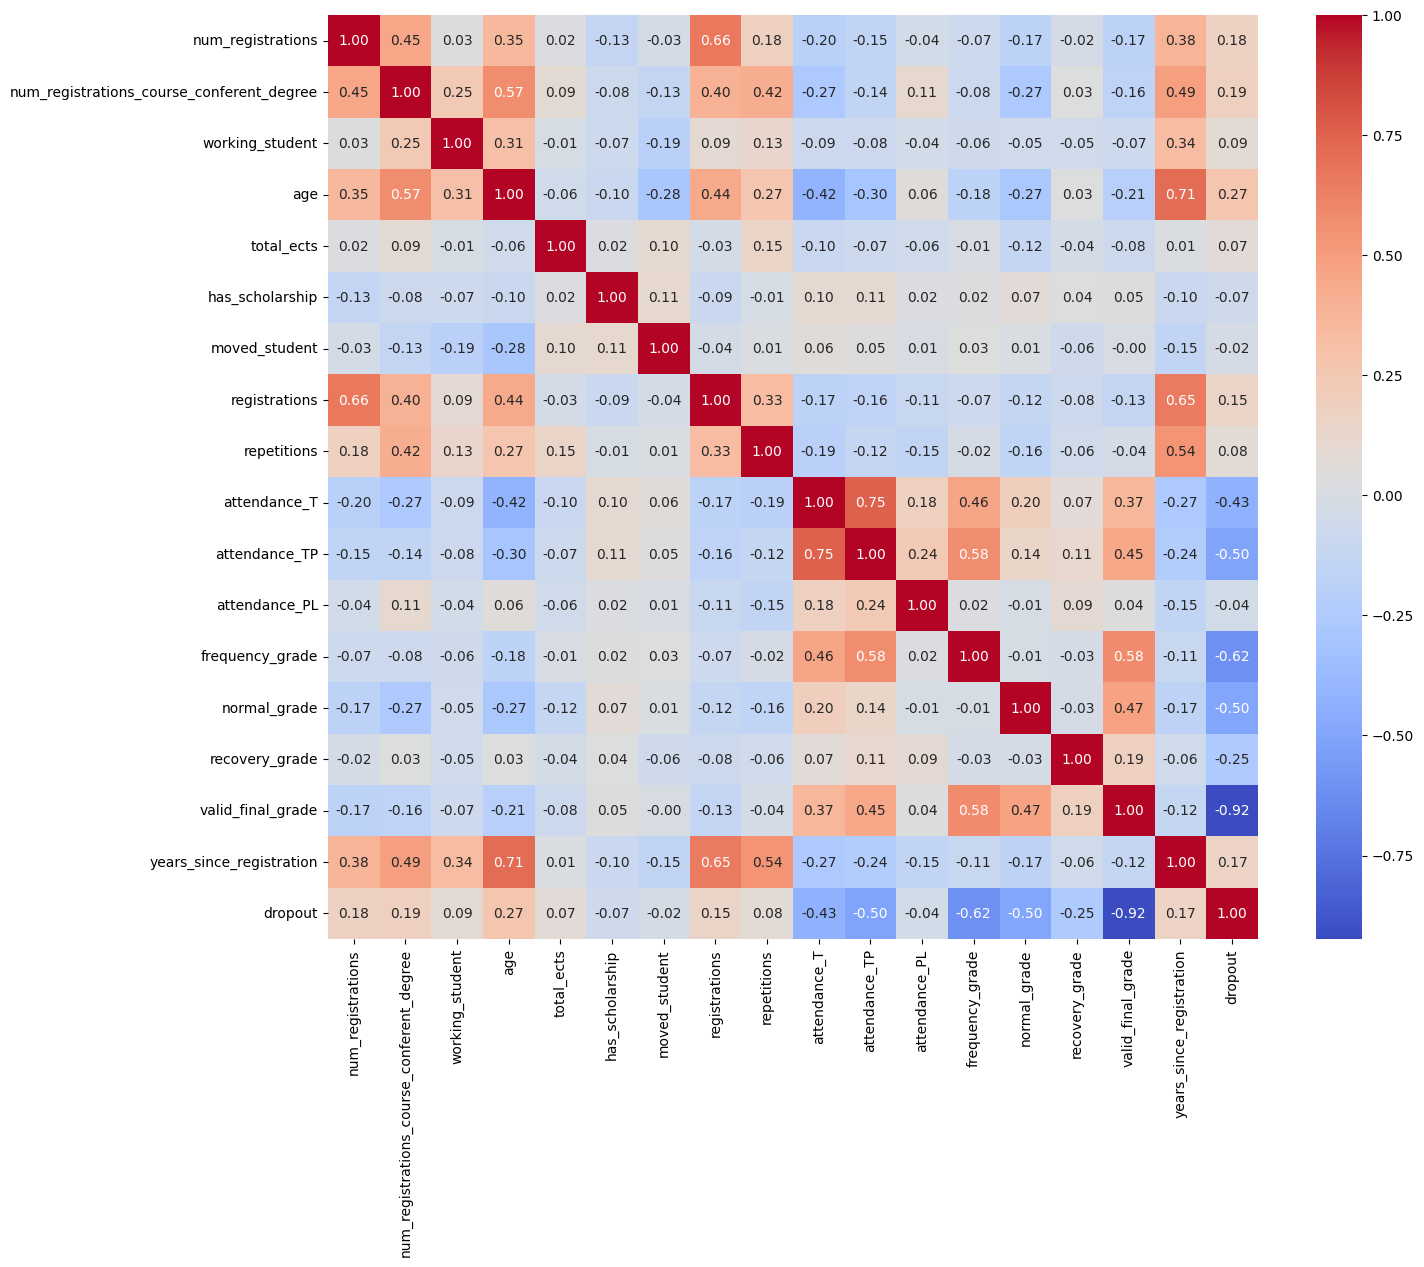

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


## Discretização

In [ ]:
data['dropout'] = data['dropout'].replace({True: 1, False: 0})
data['has_scholarship'] = data['has_scholarship'].replace({True: 1, False: 0})
data['moved_student'] = data['moved_student'].replace({True: 1, False: 0})

print(data["dropout"].mean())

0.5045045045045045


## Somando as três colunas

In [ ]:
matriz = data.values

coluna1 = "attendance_T"
coluna2 = "attendance_TP"
coluna3 = "attendance_PL"
coluna4 = "nacionality"


# índices das colunas
indice_coluna1 = data.columns.get_loc(coluna1)
indice_coluna2 = data.columns.get_loc(coluna2)
indice_coluna3 = data.columns.get_loc(coluna3)

# A soma das três colunas originais
nova_coluna = np.sum(matriz[:, [indice_coluna1, indice_coluna2, indice_coluna3]], axis=1)
matriz_com_nova_coluna = np.column_stack((matriz, nova_coluna))

nomes_colunas = list(data.columns) + ['SomaColunas']
df_com_nova_coluna = pd.DataFrame(matriz_com_nova_coluna, columns=nomes_colunas)

df_com_nova_coluna = df_com_nova_coluna.drop(columns=[coluna1, coluna2, coluna3,coluna4])

# coluna
print("Nova coluna:")
print(df_com_nova_coluna['SomaColunas'])

print("\nDataFrame completo com a nova coluna:")
print(df_com_nova_coluna)

Nova coluna:
0       0.636364
1       0.272727
2       0.181818
3            0.0
4       0.090909
          ...   
1549    0.576923
1550         0.0
1551    0.576923
1552         0.5
1553    0.038462
Name: SomaColunas, Length: 1554, dtype: object

DataFrame completo com a nova coluna:
     academic_year_first_registration           birth_date num_registrations  \
0                           2007/2008  06/02/1989 06:00:00                 4   
1                           2007/2008  06/01/1989 06:00:00                 1   
2                           2005/2006  12/06/1986 04:59:59                 7   
3                           2005/2006  11/07/1987 04:59:59                 4   
4                           2005/2006  25/10/1986 04:59:59                 6   
...                               ...                  ...               ...   
1549                        2018/2019  05/03/2000 06:00:00                 1   
1550                        2018/2019  19/04/1999 05:00:00                

In [ ]:
import pandas as pd

# tirandoo primeiro ano da coluna 'academic_year_first_registration'
df_com_nova_coluna['first_year'] = pd.to_datetime(df_com_nova_coluna['academic_year_first_registration'].str.extract(r'(\d{4})')[0], format='%Y')

df_com_nova_coluna['first_year'] = pd.to_datetime(df_com_nova_coluna['first_year'], format='%Y')
df_com_nova_coluna['birth_date'] = pd.to_datetime(df_com_nova_coluna['birth_date'], format='%d/%m/%Y %H:%M:%S')

# idade de entrada na faculdade
df_com_nova_coluna['age_at_entry'] = df_com_nova_coluna['first_year'].dt.year - df_com_nova_coluna['birth_date'].dt.year

df_com_nova_coluna['first_year'] = df_com_nova_coluna['first_year'].dt.year
print(df_com_nova_coluna)


     academic_year_first_registration          birth_date num_registrations  \
0                           2007/2008 1989-02-06 06:00:00                 4   
1                           2007/2008 1989-01-06 06:00:00                 1   
2                           2005/2006 1986-06-12 04:59:59                 7   
3                           2005/2006 1987-07-11 04:59:59                 4   
4                           2005/2006 1986-10-25 04:59:59                 6   
...                               ...                 ...               ...   
1549                        2018/2019 2000-03-05 06:00:00                 1   
1550                        2018/2019 1999-04-19 05:00:00                 1   
1551                        2019/2020 1999-10-26 05:00:00                 3   
1552                        2019/2020 1993-05-11 04:59:59                 1   
1553                        2019/2020 1993-12-22 06:00:00                 1   

     num_registrations_course_conferent_degree work

## Normalização

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# pegando só as colunas numéricas que precisam ser normalizadas
numeric_columns = ['age', 'total_ects', 'SomaColunas', 'years_since_registration', 'age_at_entry']

#  MinMaxScaler
scaler = MinMaxScaler()

# Aplicando a normalização só nas colunas numéricas
df_com_nova_coluna[numeric_columns] = scaler.fit_transform(df_com_nova_coluna[numeric_columns])

df_com_nova_coluna = df_com_nova_coluna.drop(['academic_year_first_registration','birth_date'], axis=1)
print(df_com_nova_coluna)





     num_registrations num_registrations_course_conferent_degree  \
0                    4                                        10   
1                    1                                         6   
2                    7                                        13   
3                    4                                         4   
4                    6                                        12   
...                ...                                       ...   
1549                 1                                         3   
1550                 1                                         3   
1551                 3                                         2   
1552                 1                                         0   
1553                 1                                         0   

     working_student       age  total_ects has_scholarship moved_student  \
0                  0  0.315789    0.000000               1             0   
1                  1  0.315789 

In [ ]:

def categorize_time(row):
    if 6 <= row < 12:
        return 0  # Manhã
    elif 12 <= row < 18:
        return 1  # Tarde
    else:
        return 2  # Noite

#Aplicando a função às colunas desejadas após a conversão para numérico
df_com_nova_coluna['TP_time_categor'] = df_com_nova_coluna['TP_time'].apply(pd.to_numeric, errors='coerce').apply(categorize_time)
df_com_nova_coluna['PL_time_categor'] = df_com_nova_coluna['PL_time'].apply(pd.to_numeric, errors='coerce').apply(categorize_time)

#  (manhã, tarde, noite)
time_category_mapping = {0: 'manhã', 1: 'tarde', 2: 'noite'}
df_com_nova_coluna['TP_time_discrete'] = df_com_nova_coluna['TP_time_categor'].map(time_category_mapping)
df_com_nova_coluna['PL_time_discrete'] = df_com_nova_coluna['PL_time_categor'].map(time_category_mapping)

# Dropando colunas
df_com_nova_coluna = df_com_nova_coluna.drop(['TP_time_discrete', 'PL_time_discrete','TP_time','PL_time','frequency_grade_result', 'normal_grade_result','normal_grade','recovery_grade_result','first_year' ], axis=1)

print(df_com_nova_coluna)






     num_registrations num_registrations_course_conferent_degree  \
0                    4                                        10   
1                    1                                         6   
2                    7                                        13   
3                    4                                         4   
4                    6                                        12   
...                ...                                       ...   
1549                 1                                         3   
1550                 1                                         3   
1551                 3                                         2   
1552                 1                                         0   
1553                 1                                         0   

     working_student       age  total_ects has_scholarship moved_student  \
0                  0  0.315789    0.000000               1             0   
1                  1  0.315789 

In [ ]:
veri =  df_com_nova_coluna.to_csv("novo_dataset.csv")

### Gráficos

considerando que existe uma relação entre a idade e os dropout's pensamos em anailsar essa duas colunas e também outras colunas para tentar detectar padrões

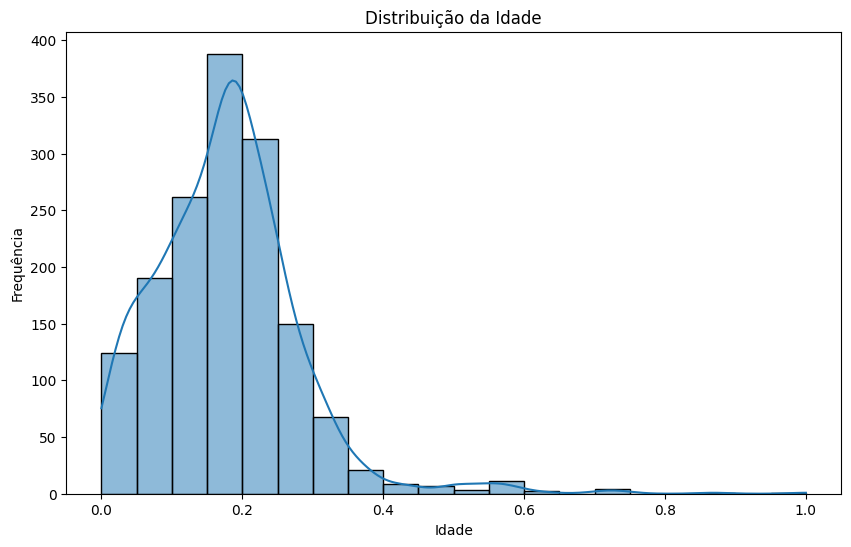

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# coluna 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df_com_nova_coluna['age'], bins=20, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


In [ ]:
import numpy as np

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Exemplo de uso
df_sem_outliers = remove_outliers_iqr(df_com_nova_coluna, 'total_ects')


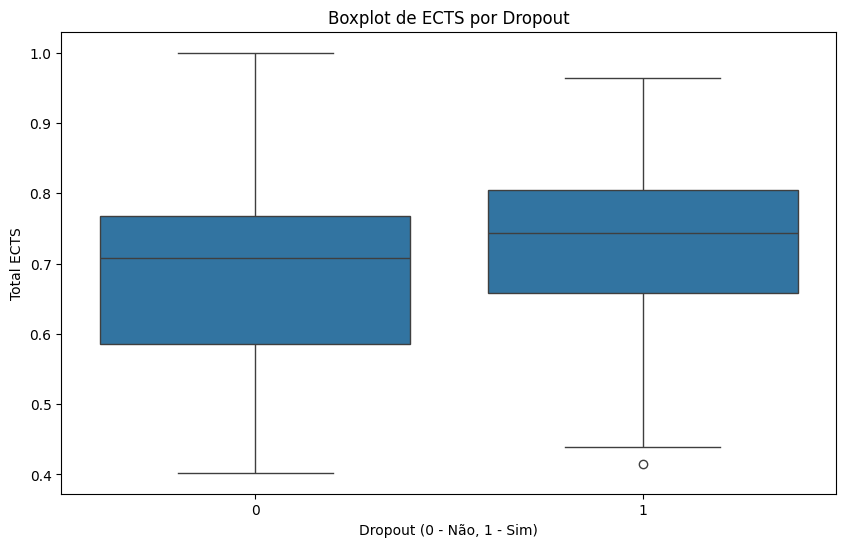

In [ ]:
# Exemplo para a coluna 'total_ects'
plt.figure(figsize=(10, 6))
sns.boxplot(x='dropout', y='total_ects', data=df_sem_outliers)
plt.title('Boxplot de ECTS por Dropout')
plt.xlabel('Dropout (0 - Não, 1 - Sim)')
plt.ylabel('Total ECTS')
plt.show()


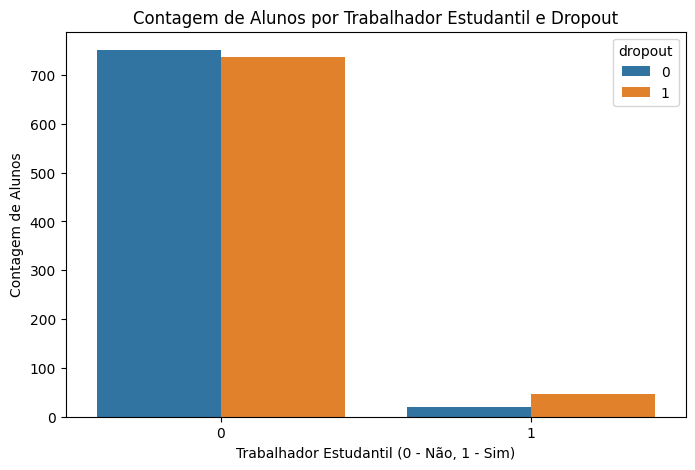

In [ ]:
# Exemplo para a coluna 'working_student'
plt.figure(figsize=(8, 5))
sns.countplot(x='working_student', hue='dropout', data=df_com_nova_coluna)
plt.title('Contagem de Alunos por Trabalhador Estudantil e Dropout')
plt.xlabel('Trabalhador Estudantil (0 - Não, 1 - Sim)')
plt.ylabel('Contagem de Alunos')
plt.show()


### verificação

Pensamos que existia uma linha com informações de duas pessoas diferentes e fizemos a verificação transformando o dataset em matriz e verificando as linhas por índice na célula a seguir

In [ ]:

# Convertendo pem matriz lembrar q é pela NumPy
matriz = data.values

# verificando linha específica pelo índice
indice_especifico = 1551
linha_especifica = matriz[indice_especifico]

# verificando coluna específica pelo índice
indice_coluna = -5
coluna_especifica = matriz[:, indice_coluna]

#  matriz e os vetores
print("Matriz:")
print(matriz)

print("\nLinha específica (índice {}):".format(indice_especifico))
print(linha_especifica)

print("\nColuna específica (índice {}):".format(indice_coluna))
print(coluna_especifica)


Matriz:
[['2007/2008' '06/02/1989 06:00:00' 'PRT' ... 0 4 True]
 ['2007/2008' '06/01/1989 06:00:00' 'PRT' ... 0 4 True]
 ['2005/2006' '12/06/1986 04:59:59' 'PRT' ... 1 6 False]
 ...
 ['2019/2020' '26/10/1999 05:00:00' 'ITA' ... 0 0 True]
 ['2019/2020' '11/05/1993 04:59:59' 'ITA' ... 1 0 False]
 ['2019/2020' '22/12/1993 06:00:00' 'BRA' ... 0 0 True]]

Linha específica (índice 1551):
['2019/2020' '26/10/1999 05:00:00' 'ITA' 3 2 0 21 50.0 False True 1 0
 '17:00:00' '21:00:00' 'ADNA' 0.0 'F' 0.0 'F' 0.0 0 0 True]

Coluna específica (índice -5):
['F' 'D' 'F' ... 'F' 'F' 'F']


## Treinando

In [ ]:


# colunas numéricas para ver outliers
numeric_columns = df_com_nova_coluna.select_dtypes(include=['float64', 'int64']).columns

# IQR para cada coluna numérica
Q1 = df_com_nova_coluna[numeric_columns].quantile(0.25)
Q3 = df_com_nova_coluna[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# regra IQR
outliers = ((df_com_nova_coluna[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_com_nova_coluna[numeric_columns] > (Q3 + 1.5 * IQR)))

# tirandolinhas com outliers
df_sem_outliers = df_com_nova_coluna[~outliers.any(axis=1)]
print(df_sem_outliers)


     num_registrations num_registrations_course_conferent_degree  \
1                    1                                         6   
3                    4                                         4   
5                    3                                         8   
6                    2                                         6   
8                    2                                         6   
...                ...                                       ...   
1545                 1                                         3   
1546                 1                                         3   
1547                 1                                         3   
1548                 1                                         3   
1549                 1                                         3   

     working_student       age  total_ects has_scholarship moved_student  \
1                  1  0.315789    0.451220               0             0   
3                  0  0.368421 

In [ ]:
 # features relevantes
features = df_sem_outliers[['num_registrations', 'num_registrations_course_conferent_degree', 'working_student', 'age', 'total_ects', 'has_scholarship', 'moved_student', 'registrations', 'repetitions','SomaColunas','age_at_entry', 'TP_time_categor']]

target = df_sem_outliers['dropout']


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inicializando o modelo Sequential
model = Sequential()

# camadas modelo
model.add(Dense(128, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


### Compilando o Model

Para compilar o modelo utilize o código abaixo

In [ ]:
# Importante usar a binary crossentropy e binary accuracy, pois temos um problema de classificação binária
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

### 1. Observações sobre o desempenho do modelo e a Acurácia (Accuracy)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv("/content/novo_dataset.csv")

# relevantes
features = df[['num_registrations', 'num_registrations_course_conferent_degree', 'working_student', 'age', 'total_ects', 'has_scholarship', 'moved_student', 'registrations', 'repetitions', 'SomaColunas', 'TP_time_categor']]

# alvo
target = df['dropout']

# treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalização antes
scaler_before = StandardScaler()
X_train_before = scaler_before.fit_transform(X_train)
X_test_before = scaler_before.transform(X_test)

# modelo Sequential
model = Sequential()

#camadas do modelo
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_before, y_train, epochs=30, batch_size=40, validation_split=0.2)

# Acurácia antes da normalização
test_loss_before, test_accuracy_before = model.evaluate(X_test_before, y_test)
print(f'Acurácia do modelo no conjunto de teste antes da normalização: {test_accuracy_before}')

# Normalização ddados depois do treinamento
scaler_after = StandardScaler()
X_train_after = scaler_after.fit_transform(X_train)
X_test_after = scaler_after.transform(X_test)

# Acurácia
test_loss_after, test_accuracy_after = model.evaluate(X_test_after, y_test)
print(f'Acurácia do modelo no conjunto de teste depois da normalização: {test_accuracy_after}')


Epoch 1/30
25/25 [==============================] - 1s 12ms/step - loss: 0.6373 - accuracy: 0.6378 - val_loss: 0.5964 - val_accuracy: 0.6988
Epoch 2/30
25/25 [==============================] - 0s 5ms/step - loss: 0.5794 - accuracy: 0.6911 - val_loss: 0.5605 - val_accuracy: 0.7068
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 0.5580 - accuracy: 0.7093 - val_loss: 0.5467 - val_accuracy: 0.7149
Epoch 4/30
25/25 [==============================] - 0s 5ms/step - loss: 0.5421 - accuracy: 0.7314 - val_loss: 0.5391 - val_accuracy: 0.7269
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 0.5329 - accuracy: 0.7354 - val_loss: 0.5353 - val_accuracy: 0.7390
Epoch 6/30
25/25 [==============================] - 0s 5ms/step - loss: 0.5223 - accuracy: 0.7515 - val_loss: 0.5333 - val_accuracy: 0.7309
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 0.5134 - accuracy: 0.7596 - val_loss: 0.5312 - val_accuracy: 0.7349
Epoch 8/30
25/25 [=

### 2. Observações sobre os padrões encontrados nos dados

o modelo só consegue identificar quem não vai desistir do curos

10/10 [==============================] - 0s 2ms/step
Matriz de Confusão:
[[  0 149]
 [  0 162]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.52      1.00      0.68       162

    accuracy                           0.52       311
   macro avg       0.26      0.50      0.34       311
weighted avg       0.27      0.52      0.36       311



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


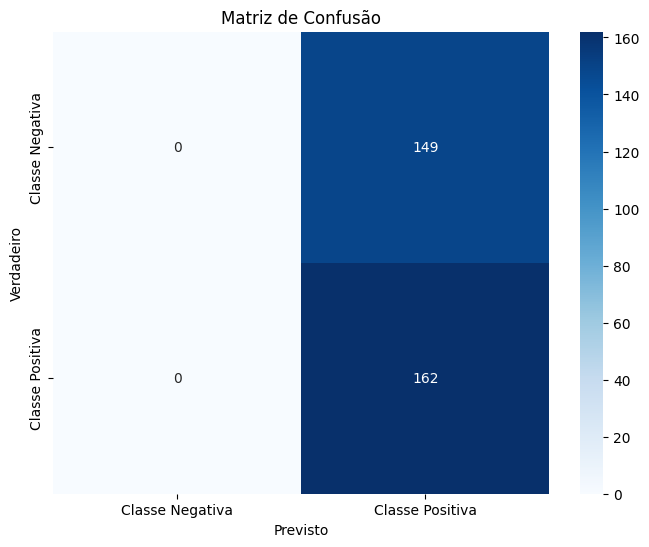

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

#métricas
classification_rep = classification_report(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("Matriz de Confusão:")
print(conf_matrix)

print("\nRelatório de Classificação:")
print(classification_rep)


from sklearn.metrics import confusion_matrix

conf_matrix = [[0, 149], [0, 162]]

# Labels das classes
class_names = ['Classe Negativa', 'Classe Positiva']

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()



### desbalanceamento de classe

In [ ]:
from sklearn.utils import class_weight

# Calcule os pesos das classes
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Passe os pesos das classes ao treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight=dict(enumerate(class_weights)))


Epoch 1/10
39/39 [==============================] - 1s 4ms/step - loss: 0.8768 - accuracy: 0.5350
Epoch 2/10
39/39 [==============================] - 0s 4ms/step - loss: 0.6206 - accuracy: 0.6452
Epoch 3/10
39/39 [==============================] - 0s 4ms/step - loss: 0.6076 - accuracy: 0.6710
Epoch 4/10
39/39 [==============================] - 0s 5ms/step - loss: 0.5849 - accuracy: 0.6991
Epoch 5/10
39/39 [==============================] - 0s 4ms/step - loss: 0.5798 - accuracy: 0.7015
Epoch 6/10
39/39 [==============================] - 0s 4ms/step - loss: 0.5935 - accuracy: 0.6790
Epoch 7/10
39/39 [==============================] - 0s 4ms/step - loss: 0.6005 - accuracy: 0.6702
Epoch 8/10
39/39 [==============================] - 0s 4ms/step - loss: 0.5725 - accuracy: 0.6991
Epoch 9/10
39/39 [==============================] - 0s 4ms/step - loss: 0.5715 - accuracy: 0.6895
Epoch 10/10
39/39 [==============================] - 0s 4ms/step - loss: 0.5614 - accuracy: 0.7096


Epoch 1/10
32/32 [==============================] - 2s 10ms/step - loss: 0.5599 - accuracy: 0.7042 - val_loss: 0.5593 - val_accuracy: 0.7229
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5673 - accuracy: 0.6851 - val_loss: 0.5661 - val_accuracy: 0.7229
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5614 - accuracy: 0.7123 - val_loss: 0.5929 - val_accuracy: 0.6908
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5613 - accuracy: 0.7012 - val_loss: 0.5620 - val_accuracy: 0.7309
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5530 - accuracy: 0.7183 - val_loss: 0.5623 - val_accuracy: 0.7068
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.7143 - val_loss: 0.5665 - val_accuracy: 0.7149
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5550 - accuracy: 0.7032 - val_loss: 0.5803 - val_accuracy: 0.6867
Epoch 8/10
32/32 [=

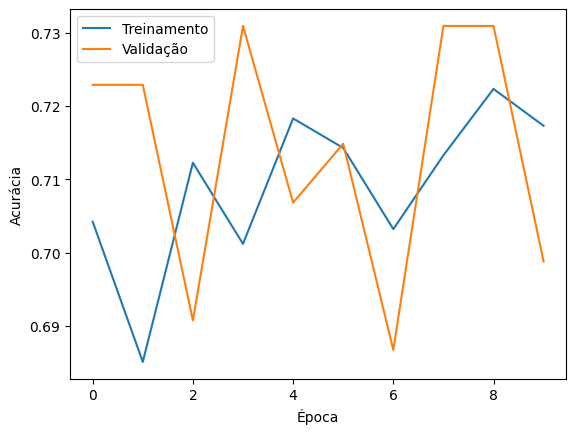

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plotar curvas de treinamento
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


### Alternativa com backpropagation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/novo_dataset.csv")

X = df.drop(['dropout'], axis=1)
y = df['dropout'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# MLP
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# modelo
model.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

X_test = scaler.transform(X_test)

# pred no conj de teste
y_pred = (model.predict(X_test) > 0.5).astype(int)

# precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')


Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 0.7666 - accuracy: 0.4658 - val_loss: 0.7043 - val_accuracy: 0.4900
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.5533 - val_loss: 0.6140 - val_accuracy: 0.6466
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5763 - accuracy: 0.7143 - val_loss: 0.5445 - val_accuracy: 0.7912
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5146 - accuracy: 0.8099 - val_loss: 0.4944 - val_accuracy: 0.8273
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4664 - accuracy: 0.8561 - val_loss: 0.4535 - val_accuracy: 0.8594
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.8893 - val_loss: 0.4192 - val_accuracy: 0.8876
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.9145 - val_loss: 0.3884 - val_accuracy: 0.8996
Epoch 8/10
32/32 [==

Epoch 1/30
32/32 [==============================] - 1s 9ms/step - loss: 0.6735 - accuracy: 0.5956 - val_loss: 0.6258 - val_accuracy: 0.6827
Epoch 2/30
32/32 [==============================] - 0s 4ms/step - loss: 0.5519 - accuracy: 0.8089 - val_loss: 0.5335 - val_accuracy: 0.8313
Epoch 3/30
32/32 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.9004 - val_loss: 0.4667 - val_accuracy: 0.8795
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 0.4088 - accuracy: 0.9256 - val_loss: 0.4175 - val_accuracy: 0.8956
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.9447 - val_loss: 0.3777 - val_accuracy: 0.9197
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 0.3253 - accuracy: 0.9517 - val_loss: 0.3449 - val_accuracy: 0.9317
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 0.2945 - accuracy: 0.9567 - val_loss: 0.3173 - val_accuracy: 0.9357
Epoch 8/30
32/32 [==

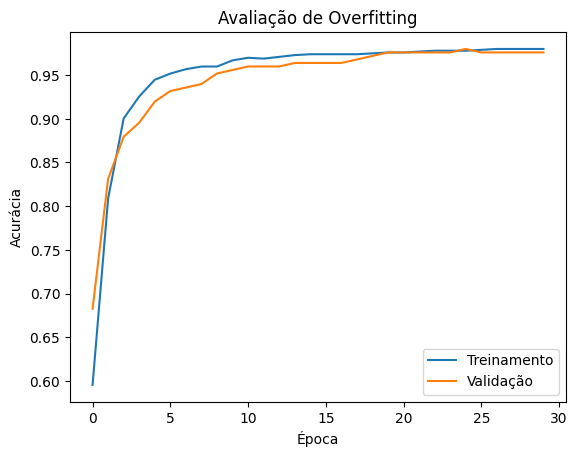

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Carregue o conjunto de dados
df = pd.read_csv("novo_dataset.csv")

# Selecione as características e o alvo
X = df.drop(['dropout'], axis=1)
y = df['dropout'].astype(int)

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize os dados usando StandardScaler antes do treinamento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Crie o modelo MLP
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile o modelo
model.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento com monitoramento de overfitting
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Avalie o overfitting
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Avaliação de Overfitting')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()
